In [1]:
!pip install statsmodels
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 25.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# ETL


In [3]:
import pandas as pd

df_companies = pd.read_csv('Time_series/sp500_companies.csv')
df_index = pd.read_csv('Time_series/sp500_index.csv')
df_stocks = pd.read_csv('Time_series/sp500_stocks.csv')

In [4]:
df_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,146.76,3600022765568,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.064848
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,228.22,3449727746048,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.062141
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,426.89,3173875974144,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.057172
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,211.48,2223712239616,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.040056
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,177.35,2160335912960,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.038914


In [5]:
df_index['Date'] = pd.to_datetime(df_index['Date'])
df_index.head()


,Date,S&P500
0,2014-11-14,2039.82
1,2014-11-17,2041.32
2,2014-11-18,2051.80
3,2014-11-19,2048.72
4,2014-11-20,2052.75


In [6]:
print(f"Nel DF sono presenti info di {len(df_stocks["Symbol"].unique())} società")
print(f"Lunghezza complessiva: {len(df_stocks)}")
print(f"Nel DF sono presenti num data di {len(df_stocks["Date"].unique())}")
df_stocks.head(20)

Nel DF sono presenti info di 503 società
Lunghezza complessiva: 1882729
Nel DF sono presenti num data di 3743


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.016708,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.741032,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.361355,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.393158,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.705982,70.501671,70.501671,69.648827,69.974915,4073337.0
5,2010-01-11,MMM,44.525719,70.217392,70.735786,69.740807,70.551842,3500812.0
6,2010-01-12,MMM,44.562832,70.275917,70.384613,69.648827,69.882942,3626033.0
7,2010-01-13,MMM,44.419670,70.050163,70.326088,69.565216,70.326088,3709992.0
8,2010-01-14,MMM,44.271217,69.816055,70.175583,69.749161,70.016724,3150384.0
9,2010-01-15,MMM,44.202293,69.707359,70.309364,69.289299,69.832779,4730180.0


## Previsione valore S&P500

Obiettivo: Prevedere prezzo dei primi 6 mesi del 2025

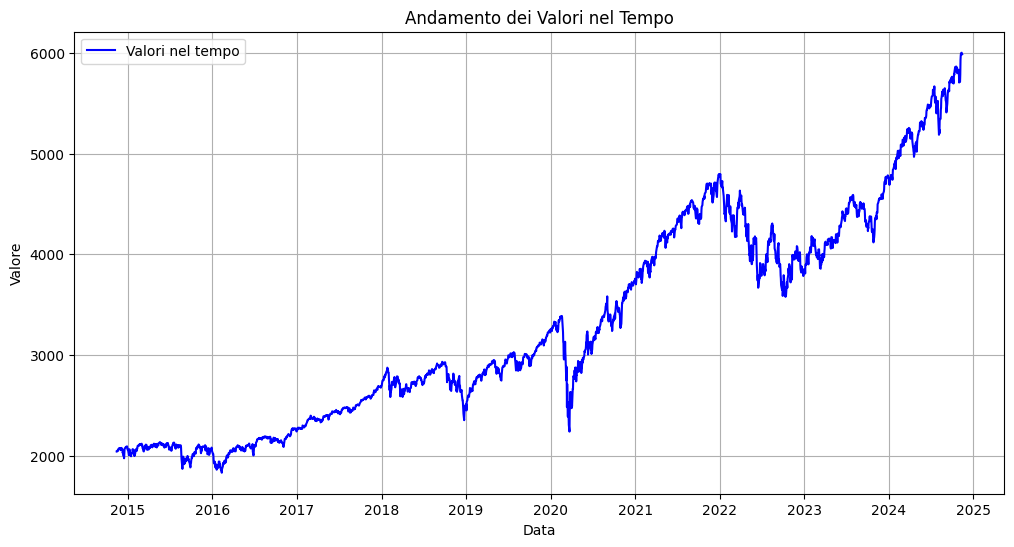

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che il tuo DataFrame si chiami 'df' e contenga le colonne 'Date' e 'Value'
# Assicurati che la colonna 'Date' sia di tipo datetime

# Esempio di DataFrame
# df = pd.DataFrame({
#     'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
#     'Value': range(100)
# })


# Imposta la colonna 'Date' come indice
plt.figure(figsize=(12, 6))  # Dimensione del grafico
plt.plot(df_index['Date'], df_index['S&P500'], label='Valori nel tempo', color='blue')

# Aggiungi dettagli al grafico
plt.title('Andamento dei Valori nel Tempo')
plt.xlabel('Data')
plt.ylabel('Valore')
plt.grid(True)
plt.legend()

# Mostra il grafico
plt.show()

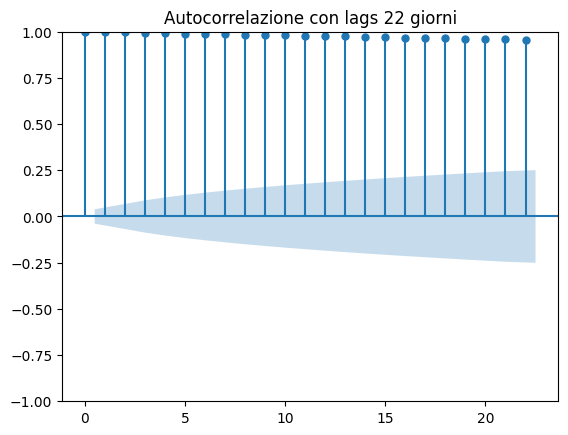

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
lags = 22
plot_acf(df_index['S&P500'], lags=lags)
plt.title(f'Autocorrelazione con lags {lags} giorni')
plt.show()


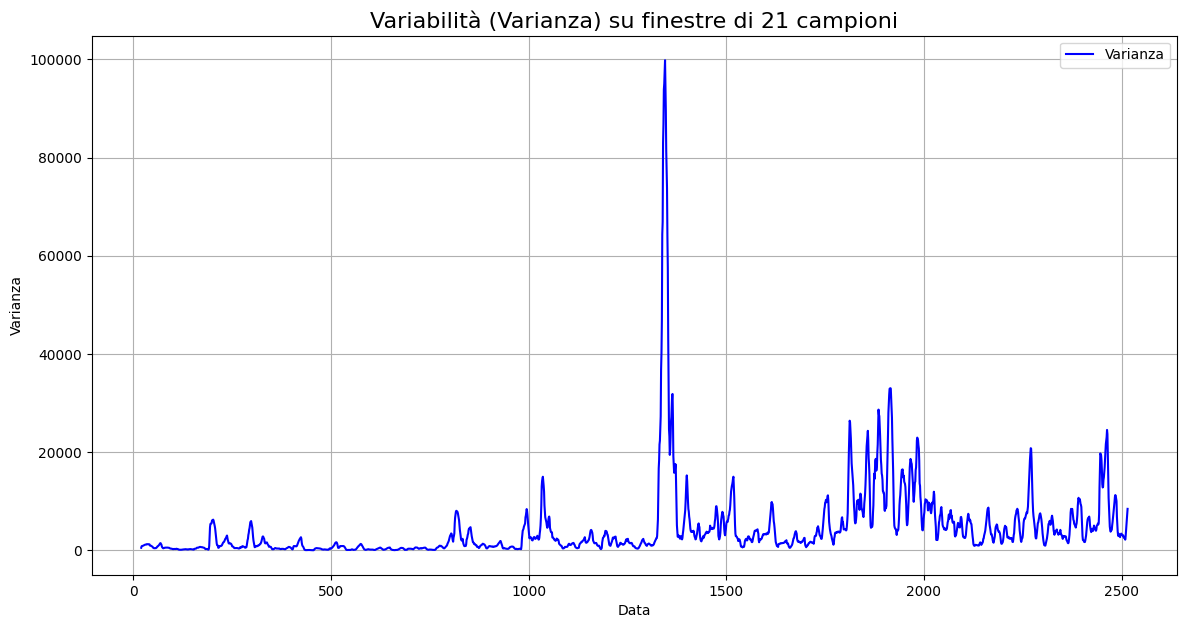

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumiamo che df_index['S&P500'] contenga la serie temporale
# Calcoliamo la deviazione standard su finestre di 30 campioni
window_size = 21
rolling_std = df_index['S&P500'].rolling(window=window_size).var()

# Creiamo un grafico della deviazione standard
plt.figure(figsize=(14, 7))
plt.plot(rolling_std, label='Varianza', color='b')
plt.title(f'Variabilità (Varianza) su finestre di {window_size} campioni', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Varianza')
plt.legend()
plt.grid(True)
plt.show()


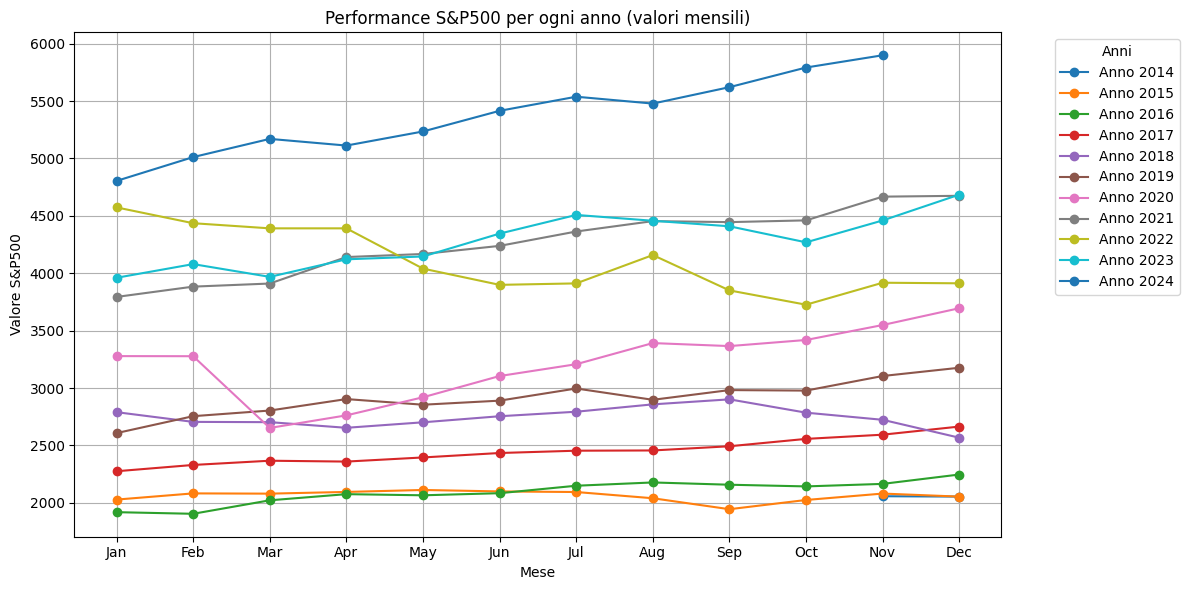

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assicurati che la colonna 'Date' sia in formato datetime
df_index['Date'] = pd.to_datetime(df_index['Date'])

# Estrai l'anno e il mese
df_index['Year'] = df_index['Date'].dt.year
df_index['Month'] = df_index['Date'].dt.month

# Calcola la media mensile del S&P500 per ogni anno e mese
df_monthly = df_index.groupby(['Year', 'Month'])['S&P500'].mean().reset_index()

# Crea un dizionario per i nomi dei mesi
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Crea il grafico
plt.figure(figsize=(12, 6))

# Crea il grafico per ogni anno
years = df_monthly['Year'].unique()
for year in years:
    # Filtra i dati per l'anno corrente
    df_year = df_monthly[df_monthly['Year'] == year]
    
    # Traccia il grafico per questo anno
    plt.plot(df_year['Month'], df_year['S&P500'], label=f"Anno {year}", marker='o')

# Imposta l'asse x per mostrare i mesi
plt.xticks(ticks=range(1, 13), labels=month_names)

# Aggiungi titolo, etichette e legenda
plt.title("Performance S&P500 per ogni anno (valori mensili)")
plt.xlabel("Mese")
plt.ylabel("Valore S&P500")
plt.grid(True)
plt.legend(title="Anni", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.tight_layout()
plt.show()


/var/folders/d6/5xkmvg0d43z7zms8_0m9g08r0000gn/T/ipykernel_4064/831522933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='S&P500', data=df_index, palette="Set2")


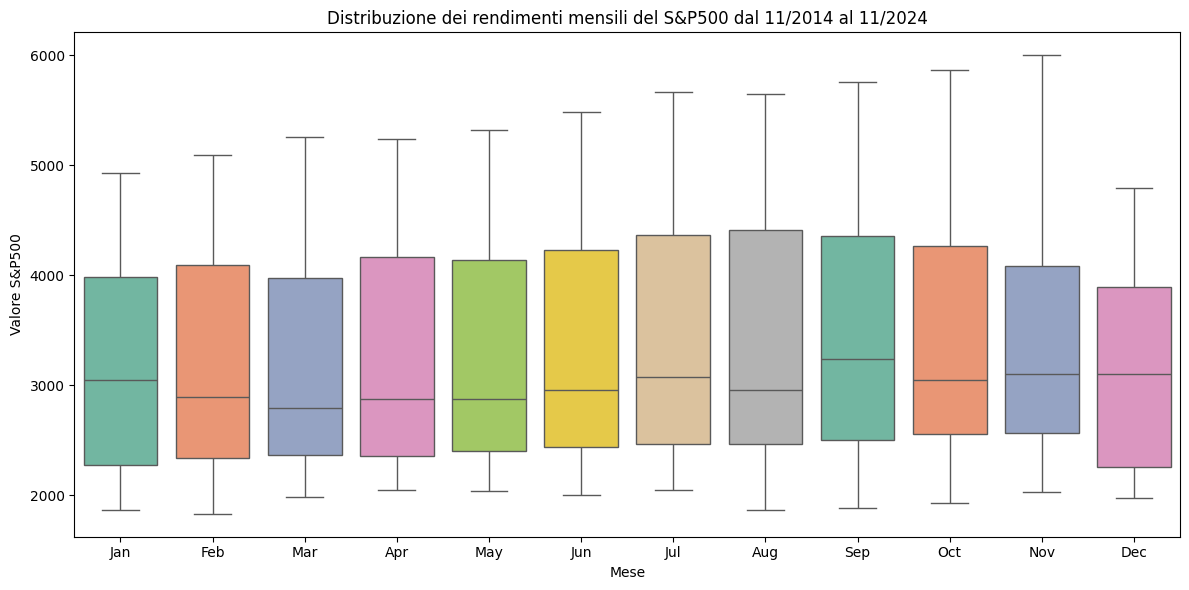

In [12]:
import seaborn as sns
# Crea un box plot per ogni mese
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='S&P500', data=df_index, palette="Set2")

# Impostazioni aggiuntive
plt.title('Distribuzione dei rendimenti mensili del S&P500 dal 11/2014 al 11/2024')
plt.xlabel('Mese')
plt.ylabel('Valore S&P500')
plt.xticks(ticks=range(12), labels=month_names, rotation=0)
plt.tight_layout()
plt.show()


### Analisi stagionalità, trend, residui, stazionarietà



Dalle precedenti analisi si puo notare come la variabilità su una finestra mensile(21/22 giorni) è mediamente bassa, mentre l'autocorrelazione è molto alta. 

Detto ciò, possiamo aggregare per mesi.

In [13]:
import copy
import pandas as pd

# Supponiamo che il tuo dataset sia caricato in un DataFrame chiamato 'df'
# df = pd.read_csv("path_to_your_file.csv")s

df_copy = copy.deepcopy(df_index)

# Impostiamo la colonna 'Date' come indice
df_copy.set_index('Date', inplace=True)

# Aggregare per mese, calcolando la media del 'S&P500'
df_monthly = df_copy.resample('M')['S&P500'].mean().reset_index()

# Formattare la colonna 'Date' nel formato anno/mese
df_monthly['Date'] = df_monthly['Date'].dt.to_period('M')

# Ora 'df_monthly' contiene la data in formato anno/mese (es. 2024-01)
df_monthly.head(120)



/var/folders/d6/5xkmvg0d43z7zms8_0m9g08r0000gn/T/ipykernel_4064/101569497.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_copy.resample('M')['S&P500'].mean().reset_index()


,Date,S&P500
0,2014-11,2057.474000
1,2014-12,2054.266364
2,2015-01,2028.178500
3,2015-02,2082.195789
4,2015-03,2079.990455
...,...,...
115,2024-06,5415.140526
116,2024-07,5538.004545
117,2024-08,5478.214545
118,2024-09,5621.260500


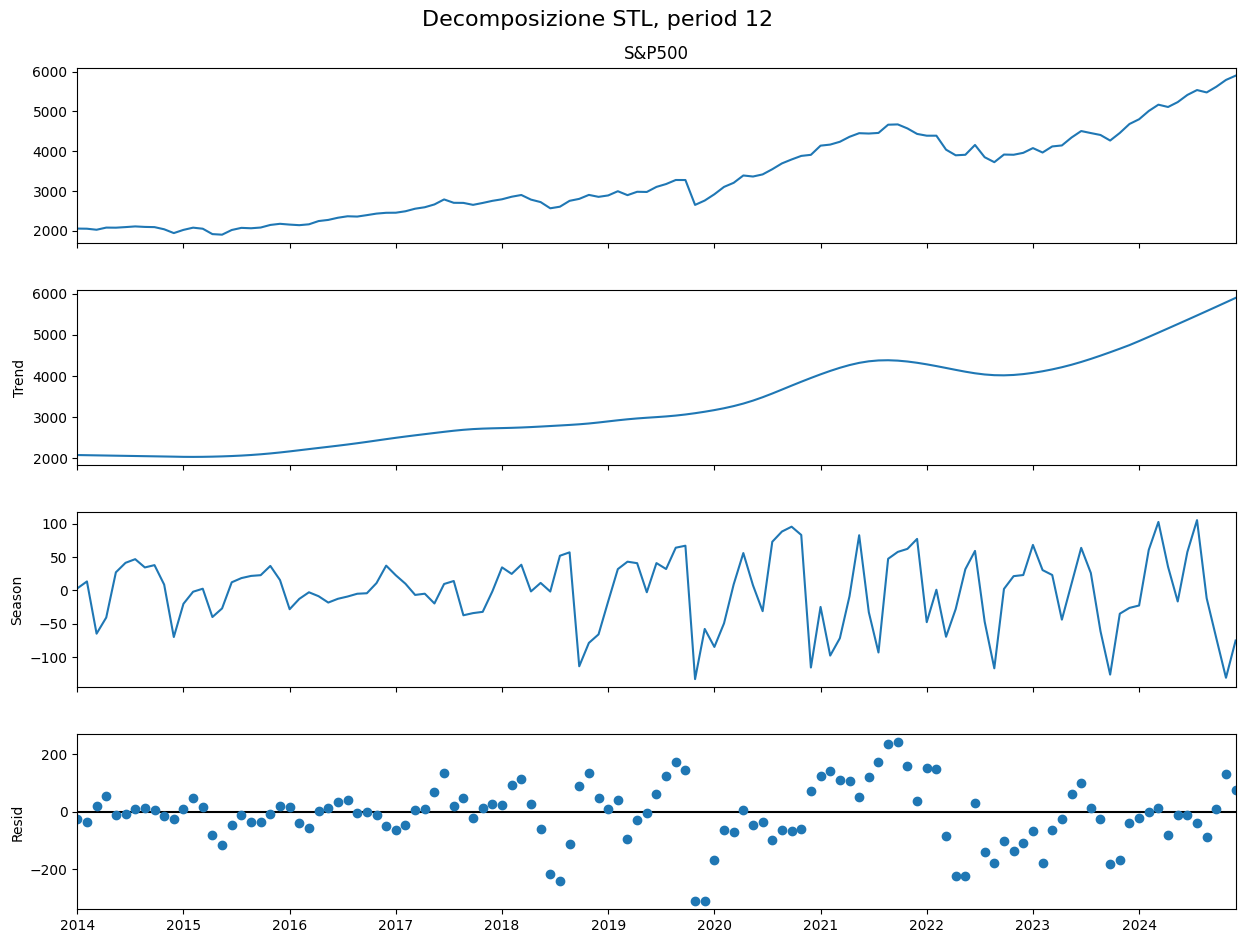

In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Supponiamo che 'df_monthly' contenga la colonna 'Date' in formato 'Period' (anno/mese)
# e la colonna 'S&P500' con i dati mensili aggregati

period = 12
# Decomposizione STL
stl = STL(df_monthly['S&P500'], period=period)  # Scegli un periodo adatto ai tuoi dati
result = stl.fit()

# Plot della decomposizione
fig = result.plot()
fig.set_size_inches(14, 10)

# Titolo della figura
plt.suptitle(f'Decomposizione STL, period {period}', fontsize=16)

# Impostare le etichette dell'asse X per visualizzare solo gli anni
years = df_monthly['Date'].dt.year.unique()  # Ottieni gli anni unici dalla colonna 'Date'

# Impostare i tick sull'asse X in corrispondenza degli anni
plt.gca().set_xticks(range(0, len(df_monthly), len(df_monthly)//len(years)))

# Impostare le etichette dell'asse X come gli anni
plt.gca().set_xticklabels(years, rotation=0)

# Visualizza il grafico
plt.show()


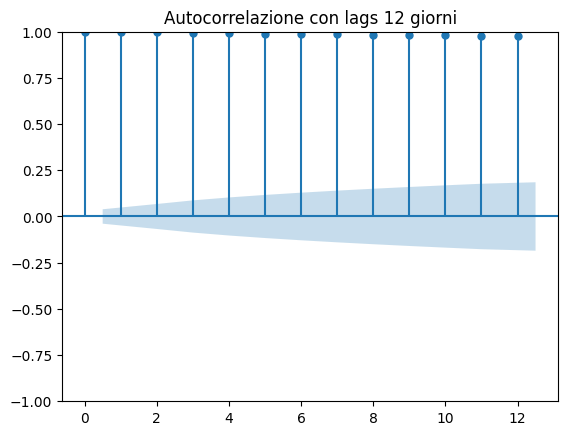

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
lags = 12
plot_acf(df_index['S&P500'], lags=lags)
plt.title(f'Autocorrelazione con lags {lags} giorni')
plt.show()


## Modello SARIMA


Vado prima a stazionalizzare la serie e successivamente lavoro con il modello SARIMA

In [17]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Funzione per eseguire il test ADF
def adf_test(series):
    result = adfuller(series)
    return result  # Restituisce tutti i valori del test ADF

# Funzione principale per differenziare la serie fino a renderla stazionaria
def make_stationary(df, column_name):
    series = df[column_name]
    adf_results = []  # Lista per salvare i risultati di ogni test ADF
    result = adf_test(series)  # Primo test ADF
    p_value = result[1]  # Ottieni il p-value iniziale
    diff_count = 0
    print(p_value)
    
    # Ciclo per differenziare finché il p-value non è inferiore a 0.05
    while p_value > 0.05:
        series = series.diff().dropna()  # Differenzia la serie
        result = adf_test(series)  # Ottieni tutti i risultati
        adf_results.append(result)  # Aggiungi il risultato alla lista
        p_value = result[1]  # Aggiorna il p-value
        diff_count += 1
        
        print(f"Differenziazione {diff_count}: p-value = {p_value:.4f}")
    
    # Visualizza la serie differenziata finale
    plt.figure(figsize=(10, 6))
    plt.plot(series)
    plt.title(f"Serie Stazionaria dopo {diff_count} differenziazioni")
    plt.xlabel('Data')
    plt.ylabel(column_name)
    plt.show()
    
    # Restituisce la serie finale, il numero di differenziazioni e i risultati del test ADF
    return series, diff_count, adf_results



0.996607748826055
Differenziazione 1: p-value = 0.0000


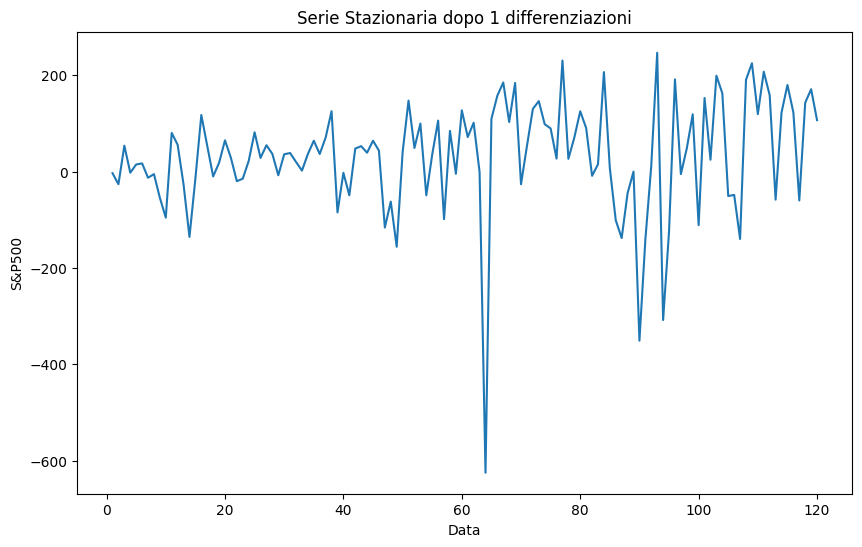


Risultato ADF dopo 1 differenziazioni:
Statistic Value: -9.505000113830521
p-value: 3.3657593174322984e-16
Number of Lags Used: 0
Number of Observations Used: 119
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


In [18]:
# Applicare la funzione per rendere la serie stazionaria
final_series, n_diffs, adf_results = make_stationary(df_monthly, 'S&P500')

# Stampa i risultati del test ADF per ogni differenziazione
for i, result in enumerate(adf_results):
    print(f"\nRisultato ADF dopo {i+1} differenziazioni:")
    print(f"Statistic Value: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Number of Lags Used: {result[2]}")
    print(f"Number of Observations Used: {result[3]}")
    print(f"Critical Values: {result[4]}")

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# Caricamento dati
# Assicurati che 'df_monthly' sia il tuo dataframe con colonne Date e S&P500
#df_monthly['Date'] = pd.to_datetime(df_monthly['Date'], format='%Y/%m')
#df_monthly.set_index('Date', inplace=True)

# Se i dati non sono stazionari, applica differenze per rendere i dati stazionari
# Questo può essere fatto anche automaticamente da auto_arima

# Trova automaticamente il miglior modello SARIMA con auto_arima
m = 12 # Provare a lavorare con questo 
model = auto_arima(df_monthly['S&P500'], seasonal=True, m=12, stepwise=True, trace=True)

# Stampa i parametri del miglior modello trovato
print(model.summary())




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=25226.130, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=25304.973, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25291.784, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=25293.121, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=25307.489, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=25224.106, Time=3.91 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=25222.178, Time=1.09 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=25224.368, Time=4.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=25289.343, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=25289.576, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=25223.827, Time=1.09 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=25290.070, Time=1.21 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=25288.600, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=25288.892, Time=0.85 sec
 ARIM

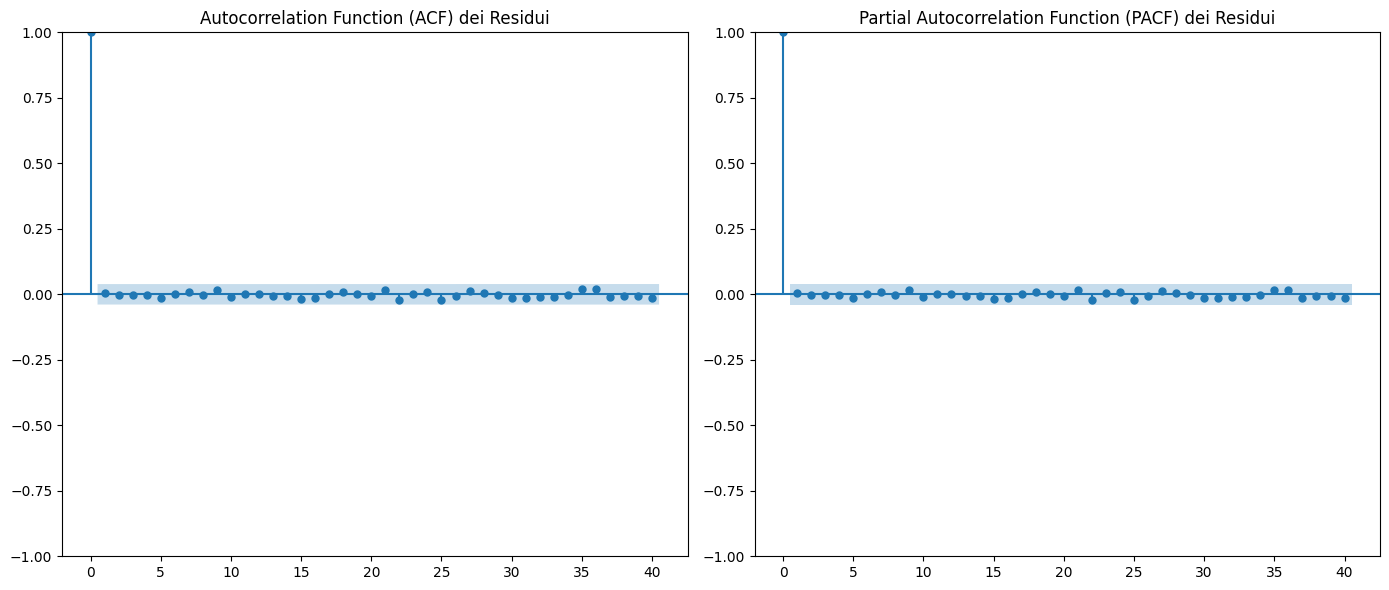

In [28]:
# Previsione dei residui
residuals = model.resid()


# Previsione dei residui
residuals = model.resid()


# Creazione dei grafici ACF e PACF dei residui
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF: Autocorrelation Function
plot_acf(residuals, ax=axes[0], lags=40)  # Lags=40 per osservare la correlazione a lungo termine
axes[0].set_title('Autocorrelation Function (ACF) dei Residui')

# PACF: Partial Autocorrelation Function
plot_pacf(residuals, ax=axes[1], lags=40)  # Lags=40 per osservare la correlazione parziale
axes[1].set_title('Partial Autocorrelation Function (PACF) dei Residui')

plt.tight_layout()
plt.show()

Shapiro-Wilk Test - Statistica: 0.48106005063844726, p-value: 3.6521994025777094e-65
I residui NON seguono una distribuzione normale.


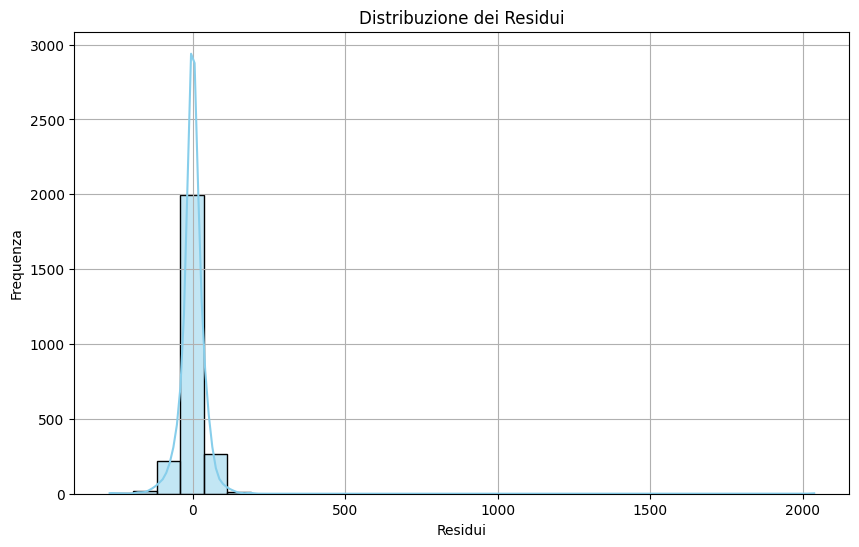

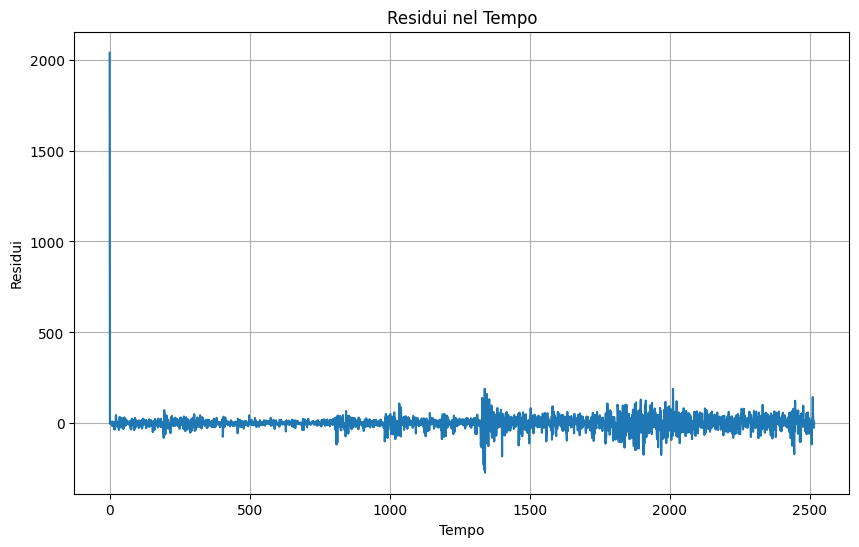

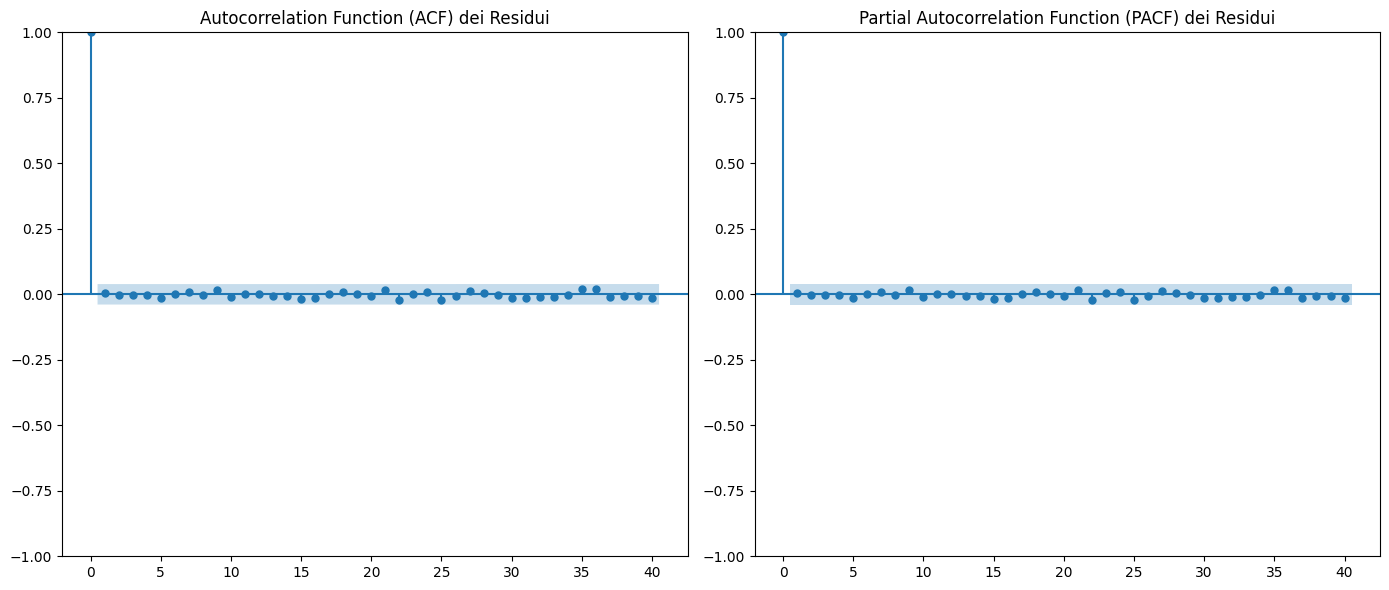

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.api as sm

# Supponiamo che 'model' sia il tuo modello ARIMA, e 'residuals' siano i residui del modello
residuals = model.resid()

# 1. Test di normalità: Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test - Statistica: {shapiro_stat}, p-value: {shapiro_p_value}")

# Se p-value < 0.05, rifiutiamo l'ipotesi nulla di normalità
if shapiro_p_value < 0.05:
    print("I residui NON seguono una distribuzione normale.")
else:
    print("I residui seguono una distribuzione normale.")

# 3. Visualizzazione della distribuzione dei residui (istogramma)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', bins=30)
plt.title("Distribuzione dei Residui")
plt.xlabel("Residui")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()

# 4. Grafico dei residui nel tempo
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residui nel Tempo")
plt.xlabel("Tempo")
plt.ylabel("Residui")
plt.grid(True)
plt.show()

# 5. ACF e PACF dei residui
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF: Autocorrelation Function
plot_acf(residuals, ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation Function (ACF) dei Residui')

# PACF: Partial Autocorrelation Function
plot_pacf(residuals, ax=axes[1], lags=40)
axes[1].set_title('Partial Autocorrelation Function (PACF) dei Residui')

plt.tight_layout()
plt.show()
